# 07. MCMC의 원리

In [19]:
library(tidyverse)

<br>

## 07.01. 배경
- 다음과 같은 정규-정규 모델을 가정

$$\begin{equation}
\begin{split}
Y|\mu & \sim \text{N}(\mu, 0.75^2) \\
\mu   & \sim \text{N}(0, 1^2)  \\
\end{split}
\end{equation}$$

- $y \in (-\infty, \infty)$와 $\mu \in (-\infty, \infty)$에 대한 가능도 함수와 사전분포의 확률밀도함수는

$$\begin{equation}
L(\mu|y) = \frac{1}{\sqrt{2\pi \cdot 0.75^2}} \exp\bigg[{-\frac{(y-\mu)^2}{2 \cdot 0.75^2}}\bigg]
\;\;\;\;\; \text{ and } \;\;\;\;\; 
f(\mu) = \frac{1}{\sqrt{2\pi}} \exp\bigg[{-\frac{\mu^2}{2}}\bigg]  .
\end{equation}$$

- $Y=6.25$를 관측하였을 때, 켤레사전분포에 의하여
$$\mu | (Y = 6.25) \sim \text{N}(4, 0.6^2)  .$$

<br>

- 만약 $N=5000$인 마르코프 체인 $\left\lbrace \mu^{(1)}, \mu^{(2)}, \ldots, \mu^{(N)} \right\rbrace$을 $\mu$의 사후분포에 범위에 대한 경로라고 한다면, 올바른 경로탐색을 위한 과정이 필요

    - 예: 이론적 사후분포가 $N(4, 06^2)$라면, 마르코프 체인의 각 값 $\mu^{(i)}$들이 [2, 6]사이의 범위에서 많이 나올수록 좋은 결과
    
<br>

### $\rightarrow$ **Metropolis-Hastings 알고리즘** :
    
>1. 만약 $i$번째 값이 $\mu^{(i)}$일 때, 무작위로 다음 값의 후보값 $\mu^{'}$를 제안 (무작위 지정값 $\mu^{'}$)
>
>2. 무작위로 지정한 $\mu^{'}$ 값을 다음 값으로 선택 ($\mu^{(i+1)} = \mu'$)혹은, 
>
>   현재 값을 유지할지 결정 ($\mu^{(i+1)} = \mu$)

<br>

**Monte Carlo 알고리즘 (Metropolis-Hastings 알고리즘의 특별한 경우)** :
> 사후분포의 확률밀도함수 Pdf $f(\mu|y)$에서 **직접**, 독립 몬테 카를로 샘플값 $\left\lbrace \mu^{(1)}, \mu^{(2)}, ..., \mu^{(N)}\right\rbrace$을 추출하기 위하여, 아래와 같이 각 값을 $\mu^{(i)} = \mu$ 결정
>
> 1. 값 제안
> 2. 사후분포 확률밀도함수 $f(\mu | y)$에서, 1.에서 제안된 $\mu$의 위치를 확인
> 3. 값으로 선택



<br>

#### **하지만, 사후분포가 복잡한 구조를 가지고 있다면, 사후분포 확률밀도함수에서 직접 몬테 카를로 샘플값을 추출하기는 불가능**
#### $\rightarrow$ 이를 보완하기 위하여, Metropolis-Hastings 알고리즘을 사용

<br>

#### Metropolis-Hastings 1단계
* Metropolis-Hastings 알고리즘은, 사후분포의 Pdf가 사전분포의 Pdf와 우도함수간의 곱과 비례하다는 점을 활용

$$f(\mu | y=6.25) \propto f(\mu)L(\mu|y=6.25).$$

- 정규화되지 않은 사후분포의 Pdf는 실제 사후분포의 Pdf(정규화된 사후분포 Pdf)가 가진 형태와 중심 경향, 변동성을 유지

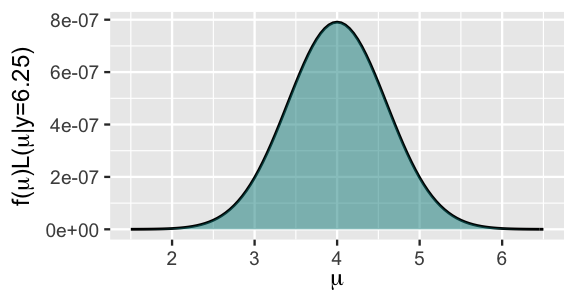

- Metropolis-Hastings 알고리즘의 1단계는 우리가 사후분포를 알지 못하여, 샘플링할 수 없는 상황에도,

    다른 모델에서 샘플링하여 마르코프 체인의 값를 제안할 수 있다는 사실에 의존
    
<br>

- 만약 $i$시점의 마르코프 체인 값이 $\mu^{(i)} = \mu$이고, 마르코프 체인의 다음 값어 선택될 확률이 $w$넓이를 가진 균등분포를 따를 때, 

    $i$번째 시점의 값을 $\mu$를 중심으로 가지는 조건부 균등분포 
    
    $$\mu' | \mu \; \sim \; \text{Unif}(\mu - w, \mu + w)$$
    
    $$q(\mu'|\mu) = \frac{1}{2w} \;\; \text{ for } \;\; \mu' \in [\mu - w, \mu + w]\;\;\;(균등분포 Pdf)$$에서 무작위로 제안 값 $\mu^{'}$을 선택
    
    ($\mu^{'}$이 선택될 확률은 $[\mu-w, \mu+w]$범위의 모든 값에에 대해서 동일)
    
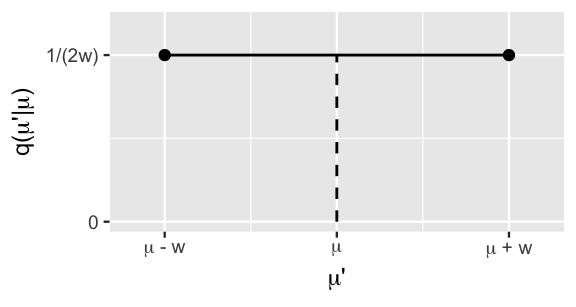
    
    

- 만약 $i$번째 마르코프 체인값 $\mu=3$이고, 다음 값이 선택될 확률이 $w=1$인 균등분포를 따를 떄, $\text{Unif}(3-w, 3+w) = \text{Unif}(2,4)$

    ($\mu^{'}$은 2 ~ 4의 범위의 값에서, 무작위로 선택됨)
    
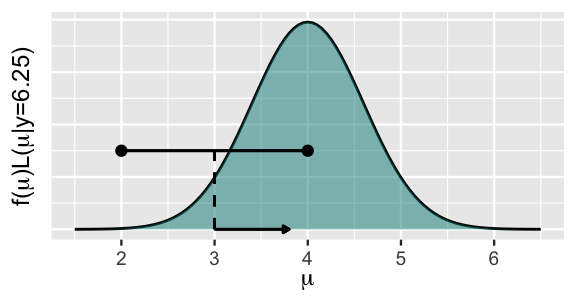

#### Metropolis-Hastings 2단계
- **1단계를 통해서 제안된 값 $\mu^{'}$에 의한 (정규화되지 않은) 사후확률 값이**

    **현재의 값 $\mu$에 의한 (정규화되지 않은) 사후확률보다 클 떄,** 
    
    **$\mu^{'}$값을 채택**
    
    $$f(\mu')L(\mu'|y) > f(\mu)L(\mu|y)$$
    
- 만약 위 조건을 만족하지 않는다면, $\mu^{'}$값을 기각


<br>

## 07.02. Metropolis-Hastings 알고리즘
> $y$값에 따른 $\mu$의 사후분포가 $f(\mu | y) \propto f(\mu) L(\mu |y)$일 때, 
>
>  $f(\mu|y)$근사를 위한 Metropolis-Hastings 마르코프 체인 $\left\lbrace \mu^{(1)}, \mu^{(2)}, ..., \mu^{(N)}\right\rbrace$는,
>
>  $\mu^{(i)}$값에 대한 $N-1$번의 ($i \in \{1,2,...,N-1\}$) 선택에 의하여 결정되며, 값 선택 절차는 아래와 같음

> **1. 다음 값에 대한 제안**
> 
> $i$번째 값이 $\mu$일 때, 제안분포의 Pdf $q(\mu'|\mu)$를 통하여 제안값 $\mu^{'}$를 결정
>


> **2. 제안된 값의 수용여부 결정**
> 
> $\mu^{'}$값에 대한 수용확률 $\alpha$를 계산
> $$\begin{equation}
  \alpha = \min\left\lbrace 1, \; \frac{f(\mu')L(\mu'|y)}{f(\mu)L(\mu|y)} \frac{q(\mu|\mu')}{q(\mu'|\mu)} \right\rbrace.
  \end{equation}$$
> $\alpha$값에 의하여, $\mu^{'}$값을 $\mu^{(i+1)}$로 수용할지 결정
> $$\mu^{(i+1)} = 
 \begin{cases}
 \mu' &  \text{ with probability } \alpha \\
 \mu &  \text{ with probability } 1- \alpha. \\
 \end{cases}$$

<br>

### Metropolis 알고리즘
> **Metropolis-Hastings에서 제안분포가 대칭인 특별한 경우**
> 
> 마르코프 체인 값이 $\mu$에서 $\mu^{'}$로 변결될 확률과, $\mu^{'}$에서 $\mu$로 변경될 확률이 동일 ($q(\mu'|\mu) = q(\mu|\mu')$)
>
> 수용확률 $\alpha$는
> $$\begin{equation}
\alpha = \min\left\lbrace 1, \; \frac{f(\mu')L(\mu'|y)}{f(\mu)L(\mu|y)} \right\rbrace  .
\end{equation}$$

<br>

- 위 정규-정규 분포의 예제에서, 제안분포는 균등분포 이므로,

    $$q(\mu'|\mu) = q(\mu|\mu') = 
    \begin{cases} 
    \frac{1}{2w} & \text{ when $\mu$ and $\mu'$ are within $w$ units of each other} \\
    0 & \text{ otherwise} \\
    \end{cases} .$$
    
    만약 체인의 $i$번째 값이 $\mu=3$ 기준의 제안분포 범위에서, 제안 값 $\mu^{'}=3.8$이 선택될 확률과,
    
    제안 값 $\mu^{'}$ 기준의 제안분포 범위에서, $\mu^{(i)}$이 선택될 확률은 $\frac{1}{2w}$로 동일
    
    $$\begin{equation}
\alpha = \min\left\lbrace 1, \; \frac{f(\mu')L(\mu'|y) / f(y)}{f(\mu)L(\mu|y) / f(y)} \right\rbrace = \min\left\lbrace 1, \; \frac{f(\mu'|y)}{f(\mu|y)} \right\rbrace  .
\end{equation}$$

- 따라서 $\mu$와 $\mu^{'}$의 사후분포 Pdf 값 $f(\mu'|y)$과 $f(\mu|y)$을 계산할 수 없더라도,

    그 비율은 정규화되지 않은 사후분포 Pdf 값 간의 비율과 동일하기에, 
    
    $\mu^{(i)}$에서 $\mu^{'}$값으로의 변동을 수용할 확률은, 정규화되지 않은 사후분포 Pdf값의 비교를 통하여 결정
    
    1. $f(\mu'|y) \ge f(\mu|y)$일 때
    
        수용확률 $\alpha=1$이므로, $\mu^{'}$의 타당성이 확보 $\rightarrow$  $\mu^{'}$을 수용
    
    <br>
    
    2. $f(\mu'|y) < f(\mu|y)$일 때
    
        수용확률 $\alpha = \frac{f(\mu'|y)}{f(\mu|y)} < 1  .$이므로, $\alpha$가 1에 가까운 값일 때에만 $\mu^{'}$값을 수용
    

<br>

### 시뮬레이션
- $i$번째 값이 $\mu$값이 3이라고 가정

In [1]:
current <- 3

<br>

- 제안분포가 $w=1$인 균등분포에 의하여, 제안분포는 2.9326


In [3]:
set.seed(8)
proposal <- runif(1, min = current - 1, max = current + 1)
proposal

[1] 2.93259

<br>

-  '제안값에 대한 정규화되지 않은 사후분포 Pdf 값 < $i$번째 값에 대한 정규화되지 않은 사후분포 Pdf 값'


In [4]:
proposal_plaus <- dnorm(proposal, 0, 1) * dnorm(6.25, proposal, 0.75)
proposal_plaus

[1] 1.624909e-07

In [5]:
current_plaus  <- dnorm(current, 0, 1) * dnorm(6.25, current, 0.75)
current_plaus

[1] 1.971928e-07

<br>

* 수용확률 $\alpha$

In [7]:
alpha <- min(1, proposal_plaus / current_plaus)
alpha

[1] 0.8240205

<br>

- 수용확률 $\alpha$에 의하여, 제안값의 수용여부를 결정 $\rightarrow$ 제안값 수용

In [9]:
next_stop <- sample(c(proposal, current),
                    size = 1, prob = c(alpha, 1-alpha))
next_stop

[1] 2.93259

<br>

## 07.03. Metropolis-Hastings 알고리즘 구현

- 제안분포가 $w=1$인 균등분포를 따르고 사후분포가 $N(4, 0.6^2)$일 떄, Metropolis-Hastings 1회 시행에 대한 함수

In [14]:
one_mh_iteration <- function(w, current){
 proposal <- runif(1, min = current - w, max = current + w)
  
 proposal_plaus <- dnorm(proposal, 0, 1) * dnorm(6.25, proposal, 0.75)
 current_plaus  <- dnorm(current, 0, 1) * dnorm(6.25, current, 0.75)
 alpha <- min(1, proposal_plaus / current_plaus)
 next_stop <- sample(c(proposal, current), 
                     size = 1, prob = c(alpha, 1-alpha))
  
 return(data.frame(proposal, alpha, next_stop))
}


- 체인의 시작값이 3인 N번의 Metropolis-Hastings 시행에 대한 함수

In [15]:
mh_tour <- function(N, w){
  current <- 3

  mu <- rep(0, N)

  for(i in 1:N){    
    sim <- one_mh_iteration(w = w, current = current)
    
    mu[i] <- sim$next_stop
    
    current <- sim$next_stop
  }
  
  return(data.frame(iteration = c(1:N), mu))
}

<br>

- 5000번의 시행에 따른 체인 경로 및 근사사후분포

In [16]:
set.seed(84735)
mh_simulation_1 <- mh_tour(N = 5000, w = 1)

Warning message:
"The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead."


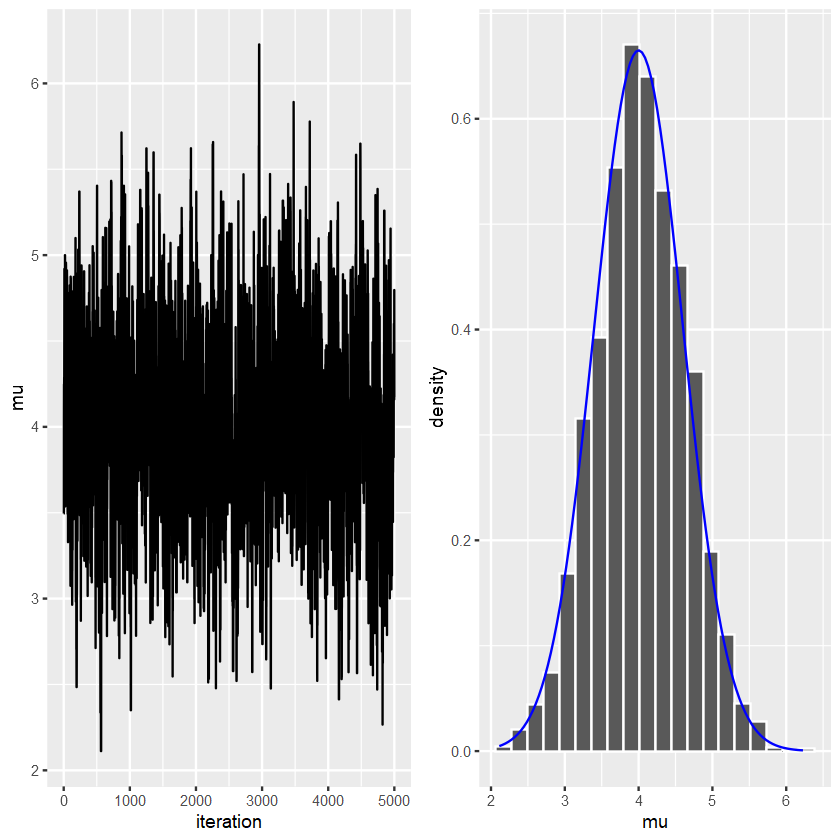

In [21]:
ggplot(mh_simulation_1, aes(x = iteration, y = mu)) + 
  geom_line() -> p1

ggplot(mh_simulation_1, aes(x = mu)) + 
  geom_histogram(aes(y = ..density..), color = "white", bins = 20) + 
  stat_function(fun = dnorm, args = list(4,0.6), color = "blue") -> p2

gridExtra::grid.arrange(p1, p2, nrow=1)

<br>

## 07.04. Metropolis-Hastings 알고리즘 조정

### 제안분포의 적절한 매개변수가 필요

<br>

#### 제안분포가 $w=0.01$인 균등분포인 경우
* 따라서 매 시행별 제안값은, 이전 값과 매우 가까운 경향이 존재하며, 
    
    $$\mu' \approx \mu$$
    
    $$f(\mu')L(\mu'|y) \approx f(\mu)L(\mu|y)$$
    
    매 제안값에 대한 수락확률이 높음

    $$\alpha = \min\left\lbrace 1, \; \frac{f(\mu')L(\mu'|y)}{f(\mu)L(\mu|y)} \right\rbrace \approx \min\left\lbrace 1, \; 1 \right\rbrace \; = 1 .$$

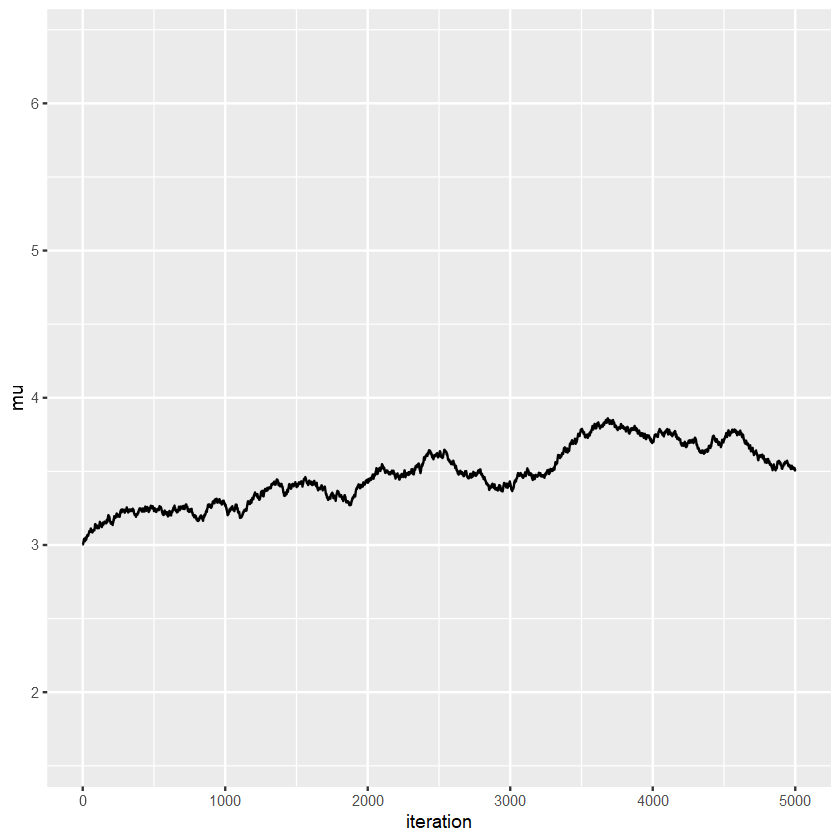

In [22]:
set.seed(84735)
mh_simulation_2 <- mh_tour(N = 5000, w = 0.01)
ggplot(mh_simulation_2, aes(x = iteration, y = mu)) + 
  geom_line() + 
  lims(y = c(1.6, 6.4))

<br>

#### 제안분포가 $w=100$인 균등분포인 경우
- 제안값과 이전값간의 차이가 과도하게 높으며, 각 제안값에 대한 제안확률도 높지 않음

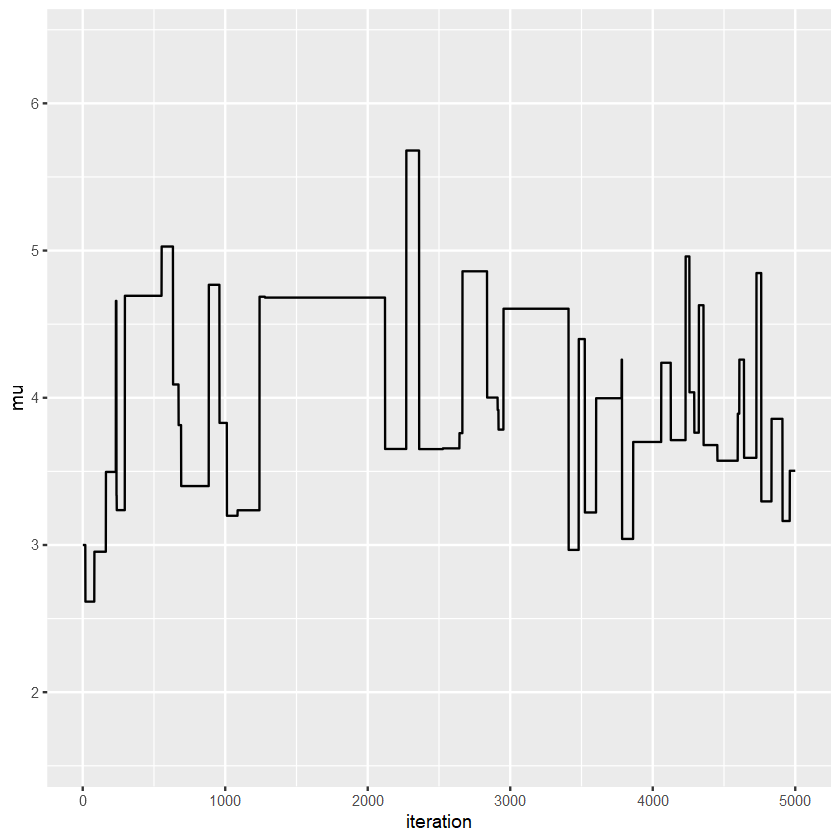

In [23]:
set.seed(7)
mh_simulation_3 <- mh_tour(N = 5000, w = 100)
ggplot(mh_simulation_3, aes(x = iteration, y = mu)) + 
  geom_line() + 
  lims(y = c(1.6,6.4))

<br>

## 07.05. 베타-이항분포 예제

$$\begin{split}
Y|\pi & \sim \text{Bin}(2, \pi) \\
\pi   & \sim \text{Beta}(2, 3)  \\
\end{split} \;\; \Rightarrow \;\;
\pi | (Y = 1) \sim \text{Beta}(3, 4)  .$$

<br>

$$f(\pi | y = 1) \propto f(\pi) L(\pi | y = 1),$$

- **$\pi$값의 범위는 0 ~ 1이므로, 제안분포는 $Beta(a, b)$이며**

    **각 시행별 제안값은 $Beta(a,b)$의 Pdf에 의하여 결정됨**
    
    **$\rightarrow$ 각 시행별 제안값은, 이전값에 영향을 받지 않음 (독립)**
    
    **$\rightarrow$ Metropolis-Hastings의 특별한 형태인 독립 샘플링 알고리즘**

<br>

### Independence sampling (독립 샘플링) 알고리즘
> **독립 샘플링 알고리즘은, 체인의 현재 위치와 관계없이 각 시행에서 동일한 제안 모델이 활용되는 Metropolis-Hastings의 특별한 경우로서**
>
> **제안분포의 Pdf $q(\pi')$에 의하여 제안된 $\pi^{'}$에 대하여, 수용확률 $\alpha$는**
>
> $$\begin{equation}
\alpha = \min\left\lbrace 1, \; \frac{f(\pi')L(\pi'|y)/f(y)}{f(\pi)L(\pi|y)/f(y)}\frac{q(\pi)}{q(\pi')} \right\rbrace = \min\left\lbrace 1, \; \frac{f(\pi'|y)}{f(\pi|y)}\frac{q(\pi)}{q(\pi')} \right\rbrace  .
\end{equation}$$

<br>

### 구현

In [24]:
one_iteration <- function(a, b, current){
 # STEP 1: 제안분포
 proposal <- rbeta(1, a, b)
  
 # STEP 2: 제안값 수용여부 결정
 proposal_plaus <- dbeta(proposal, 2, 3) * dbinom(1, 2, proposal)
 proposal_q     <- dbeta(proposal, a, b)
 current_plaus  <- dbeta(current, 2, 3) * dbinom(1, 2, current)
 current_q      <- dbeta(current, a, b)
 alpha <- min(1, proposal_plaus / current_plaus * current_q / proposal_q)
 next_stop <- sample(c(proposal, current), 
                     size = 1, prob = c(alpha, 1-alpha))
  
 return(data.frame(proposal, alpha, next_stop))
}

In [25]:
betabin_tour <- function(N, a, b){
  # 1. 체인 시작값
  current <- 0.5


  pi <- rep(0, N)
  
  # 2. 마르코프 체인 생성
  for(i in 1:N){    
    # Simulate one iteration
    sim <- one_iteration(a = a, b = b, current = current)
    
    pi[i] <- sim$next_stop
    
    current <- sim$next_stop
  }
  
  return(data.frame(iteration = c(1:N), pi))
}

<br>

- 5000번의 시행

In [ ]:
set.seed(84735)
betabin_sim <- betabin_tour(N = 5000, a = 1, b = 1)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


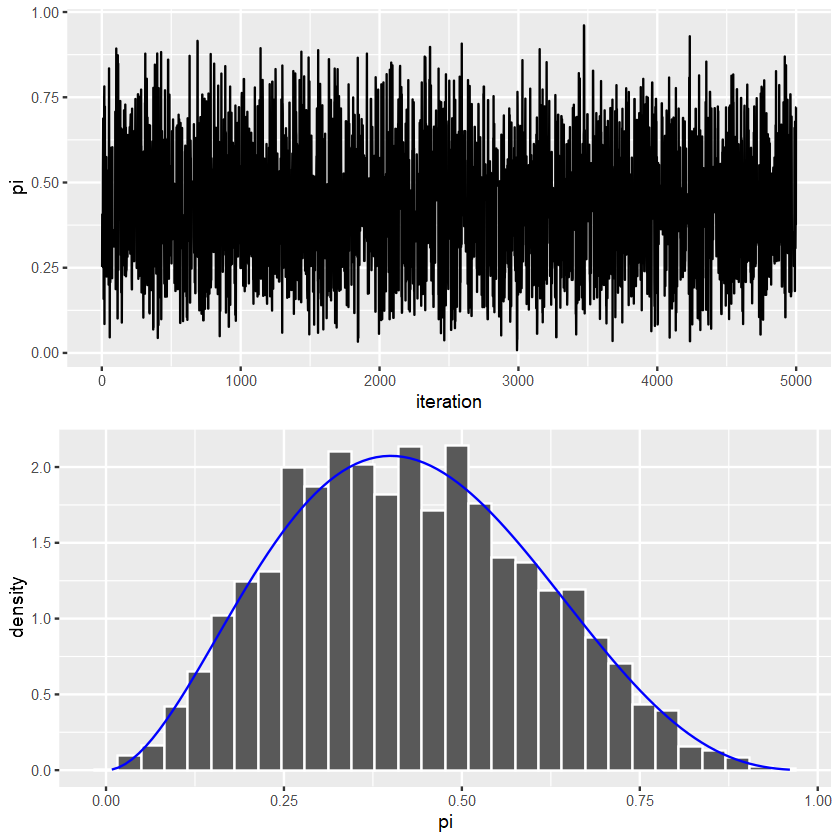

In [26]:
ggplot(betabin_sim, aes(x = iteration, y = pi)) + 
  geom_line() -> p1
ggplot(betabin_sim, aes(x = pi)) + 
  geom_histogram(aes(y = ..density..), color = "white") + 
  stat_function(fun = dbeta, args = list(3, 4), color = "blue") -> p2

gridExtra::grid.arrange(p1, p2)

<br>

## 07.06. 알고리즘이 작동하는 이유
- 제안분포의 Pdf가 $q(\mu'|\mu)$이고, 사후분포의 Pdf가 $f(\mu|y)$인 Metropolis-Hastings를 설계에서,

    $\mu$가 이산형 변수일 때, 보통 Metropolis-Hastings에 의한 체인값은 서로 다른 값 $\mu$와 $\mu^{'}$을 가지며,
    
    $\mu$에서 $\mu^{'}$로 값이 변경될 확률은
    
    $$P(\mu \to \mu') = P\left(\mu^{(i+1)}=\mu' \; | \; \mu^{(i)}=\mu \right)$$

    $$P(\mu' \to \mu) = P\left(\mu^{(i+1)}=\mu \; | \; \mu^{(i)}=\mu' \right)  .$$

* 좋은 사후분포 근사치를 생성하고 Metropolis-Hastings를 구현하기 위하여,

    $\mu$와 $\mu^{'}$의 사후분포 Pdf값 간의 비율은 보존되어야 하며, 

    $\mu$와 $\mu^{'}$는 다음을 만족해야 함
    
    $$\frac{P(\mu \to \mu')}{P(\mu' \to \mu)} = \frac{f(\mu'|y)}{f(\mu|y)}  .$$

* $\mu \rightarrow \mu^{'}$로 값이 변경될 확률은, 제안분포와 수용확률 $\alpha$를 통하여 결정

$$P(\mu \to \mu') 
= q(\mu'|\mu) \cdot \min\left\lbrace 1, \; \frac{f(\mu'|y)}{f(\mu|y)} \frac{q(\mu|\mu')}{q(\mu'|\mu)} \right\rbrace  .$$

* $\mu^{'} \rightarrow \mu$로 값이 변경될 확률은, 제안분포와 수용확률 $\alpha$를 통하여 결정
$$P(\mu' \to \mu) 
= q(\mu|\mu') \cdot \min\left\lbrace 1, \; \frac{f(\mu|y)}{f(\mu'|y)}\frac{q(\mu'|\mu)}{q(\mu|\mu')} \right\rbrace .$$

<br>

#### $P(\mu \to \mu') / P(\mu' \to \mu)$은 2가지 경우를 고려
1. **$f(\mu'|y) \ge f(\mu|y)$ : $\mu^{'}$가 $\mu$만큼 타당성을 확보**

    $$\frac{P(\mu \to \mu')}{P(\mu' \to \mu)} = \frac{q(\mu'|\mu) \times 1}{q(\mu|\mu') \frac{f(\mu|y)}{f(\mu'|y)}\frac{q(\mu'|\mu)}{q(\mu|\mu')} } = \frac{f(\mu'|y)}{f(\mu|y)}  .$$
    
2. **$f(\mu'|y) < f(\mu|y)$ : $\mu^{'}$가 $\mu$보다 타당성이 낮음**

    $$\frac{P(\mu \to \mu')}{P(\mu' \to \mu)} = \frac{q(\mu'|\mu) \frac{f(\mu'|y)}{f(\mu|y)}\frac{q(\mu|\mu')}{q(\mu'|\mu)}}{q(\mu|\mu')\times 1} = \frac{f(\mu'|y)}{f(\mu|y)}  .$$

<br>

#### 모든 경우에 대해서, Metropolis-Hastings 알고리즘은 $\mu$와 $\mu^{'}$값 쌍의 상대적 가능도를 유지